In [1]:
import kagglehub

# Скачиваем датасет
path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")

# Выводим путь к загруженным данным
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1


In [2]:
import os

# Путь к директории с данными
data_path = r'C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1'

# Список файлов в директории
files = os.listdir(data_path)
print(files)

['yield_df.csv']


In [3]:
import pandas as pd

# Путь к файлу
file_path = r'C:\Users\Azama\.cache\kagglehub\datasets\mrigaankjaswal\crop-yield-prediction-dataset\versions\1\yield_df.csv'

# Загрузка данных
data = pd.read_csv(file_path)

# Просмотр первых строк данных
print("Первые 5 строк данных:")
print(data.head())

# Получение информации о данных (типы и пропуски)
print("\nИнформация о данных:")
print(data.info())

# Статистический анализ числовых столбцов
print("\nСтатистическое описание данных:")
print(data.describe())

Первые 5 строк данных:
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  --

In [4]:
# Преобразуем столбцы 'Area' и 'Item' в категориальные переменные
data['Area'] = data['Area'].astype('category')
data['Item'] = data['Item'].astype('category')

# Проверим изменения
print(data.dtypes)

Unnamed: 0                          int64
Area                             category
Item                             category
Year                                int64
hg/ha_yield                         int64
average_rain_fall_mm_per_year     float64
pesticides_tonnes                 float64
avg_temp                          float64
dtype: object


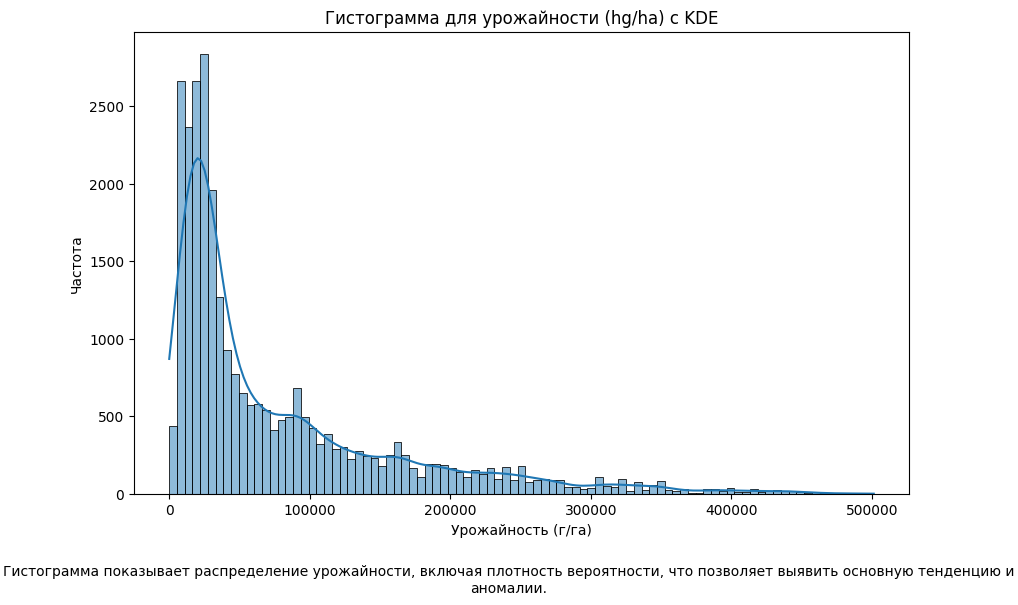

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограммы для урожайности
plt.figure(figsize=(10, 6))
sns.histplot(data['hg/ha_yield'], kde=True)
plt.title('Гистограмма для урожайности (hg/ha) с KDE')
plt.xlabel('Урожайность (г/га)')
plt.ylabel('Частота')
# Указываем положение текста чуть ниже графика
plt.figtext(
    0.5, 
    -0.05,  # Отодвигаем текст вниз
    "Гистограмма показывает распределение урожайности, включая плотность вероятности, что позволяет выявить основную тенденцию и аномалии.", 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=10
)
plt.show()

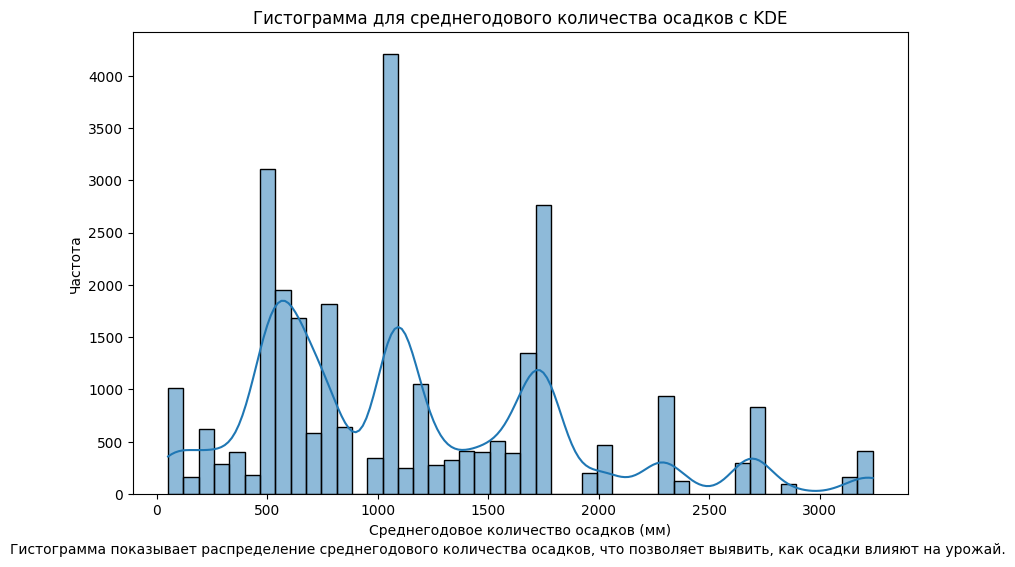

In [6]:
# Гистограмма для среднегодового количества осадков
plt.figure(figsize=(10, 6))
sns.histplot(data['average_rain_fall_mm_per_year'], kde=True)
plt.title('Гистограмма для среднегодового количества осадков с KDE')
plt.xlabel('Среднегодовое количество осадков (мм)')
plt.ylabel('Частота')
plt.figtext(0.5, 0.01, "Гистограмма показывает распределение среднегодового количества осадков, что позволяет выявить, как осадки влияют на урожай.", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

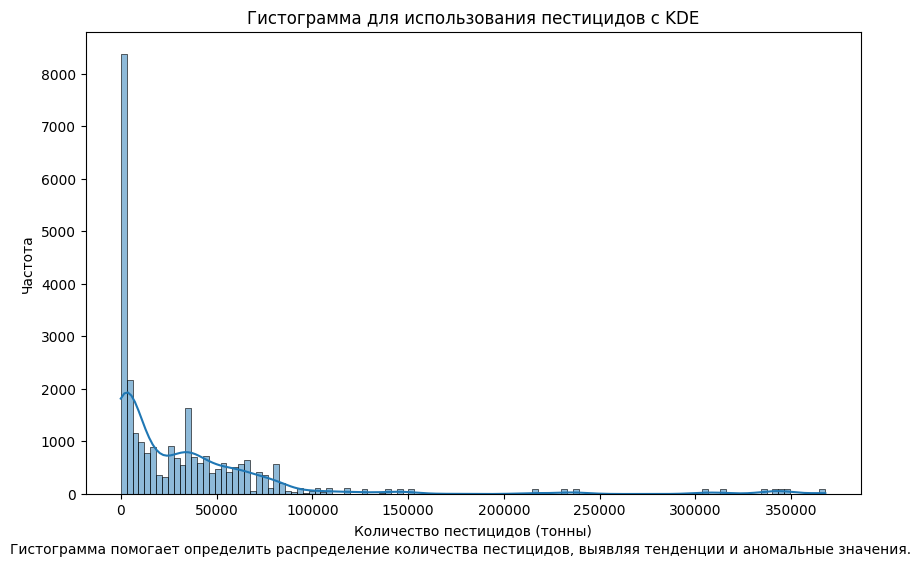

In [7]:
# Гистограмма для использования пестицидов
plt.figure(figsize=(10, 6))
sns.histplot(data['pesticides_tonnes'], kde=True)
plt.title('Гистограмма для использования пестицидов с KDE')
plt.xlabel('Количество пестицидов (тонны)')
plt.ylabel('Частота')
plt.figtext(0.5, 0.01, "Гистограмма помогает определить распределение количества пестицидов, выявляя тенденции и аномальные значения.", 
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

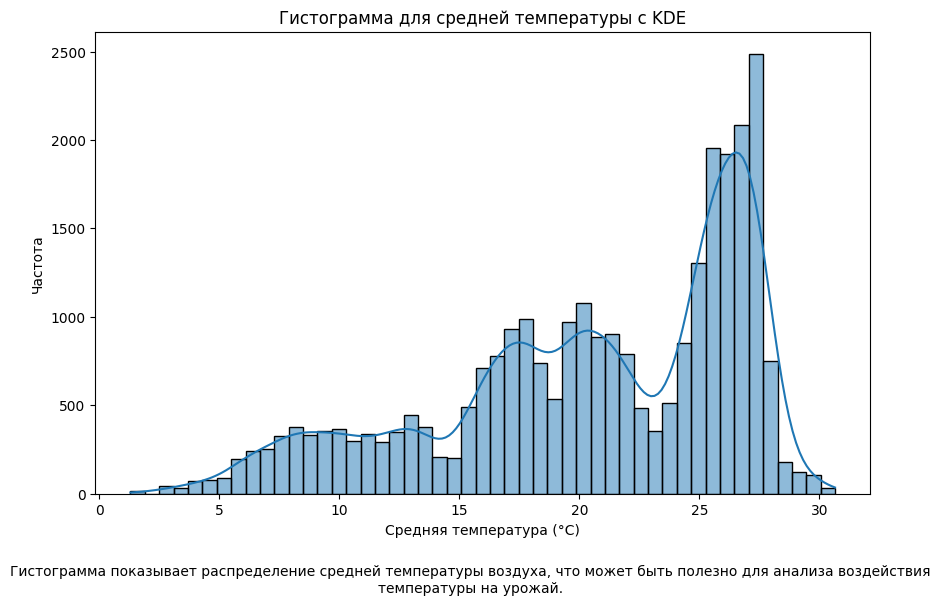

In [8]:
# Гистограмма для средней температуры
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_temp'], kde=True)
plt.title('Гистограмма для средней температуры с KDE')
plt.xlabel('Средняя температура (°C)')
plt.ylabel('Частота')

# Указываем положение текста чуть ниже графика
plt.figtext(
    0.5, 
    -0.05,  # Отодвигаем текст вниз
    "Гистограмма показывает распределение средней температуры воздуха, что может быть полезно для анализа воздействия температуры на урожай.", 
    wrap=True, 
    horizontalalignment='center', 
    fontsize=10
)
plt.show()

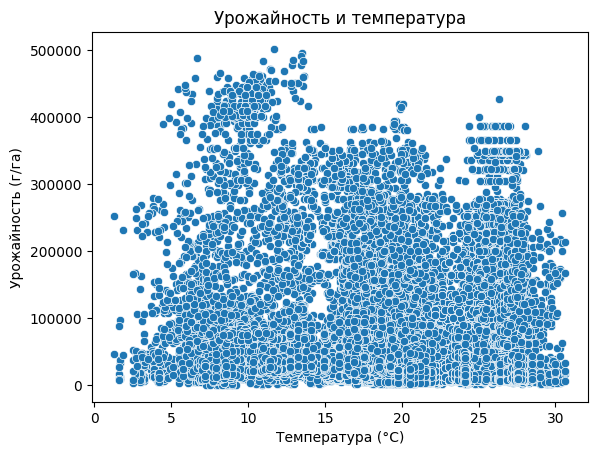

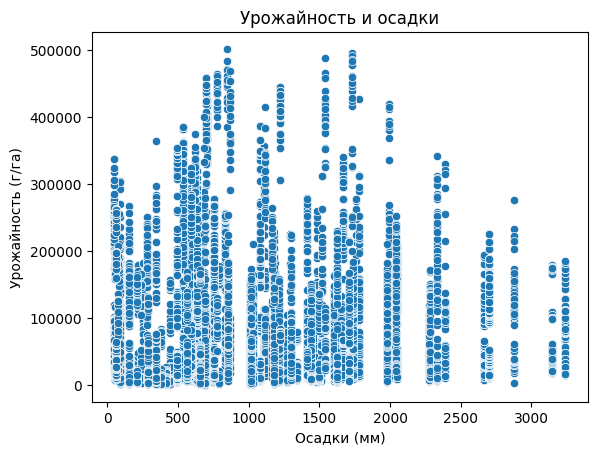

In [9]:
# Диаграмма рассеяния урожайности и температуры
sns.scatterplot(x=data['avg_temp'], y=data['hg/ha_yield'])
plt.title('Урожайность и температура')
plt.xlabel('Температура (°C)')
plt.ylabel('Урожайность (г/га)')
plt.show()

# Диаграмма рассеяния урожайности и осадков
sns.scatterplot(x=data['average_rain_fall_mm_per_year'], y=data['hg/ha_yield'])
plt.title('Урожайность и осадки')
plt.xlabel('Осадки (мм)')
plt.ylabel('Урожайность (г/га)')
plt.show()

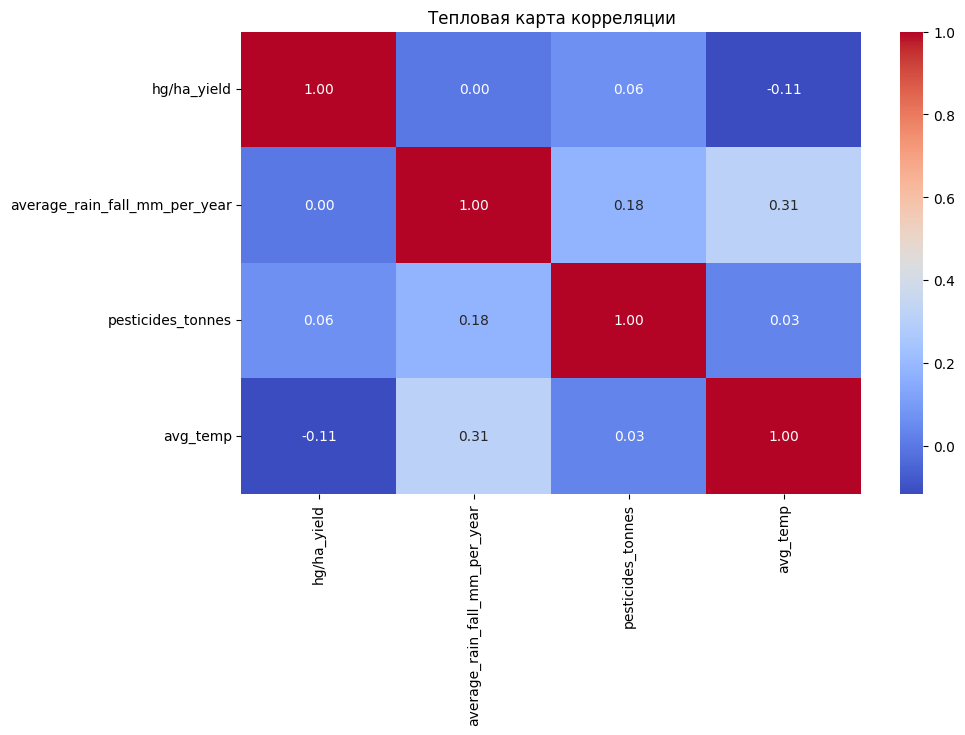

In [10]:
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 6))
corr = data[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()

Тепловая карта корреляции отображает взаимосвязь между различными числовыми переменными в наборе данных. Каждая ячейка в таблице показывает коэффициент корреляции между двумя столбцами, где значения могут варьироваться от -1 (полная отрицательная корреляция) до +1 (полная положительная корреляция).

В данной диаграмме:

Светлые оттенки (красные и желтые) указывают на сильные положительные корреляции. Темные оттенки (синие) показывают сильные отрицательные корреляции. Нейтральные оттенки (белые и зеленые) указывают на слабую или отсутствующую корреляцию. Тепловая карта помогает выявить, какие переменные тесно связаны между собой. Например, высокая положительная корреляция между переменными может означать, что при увеличении одной переменной другая также увеличивается. Важность этой карты заключается в том, что она помогает определить наиболее важные факторы, которые могут оказывать влияние на другие, что полезно при построении модели или анализе данных.

Пример интерпретации: Если коэффициент корреляции между "hg/ha_yield" и "average_rain_fall_mm_per_year" высок, это может означать, что урожайность зависит от количества осадков. Если корреляция между "avg_temp" и "hg/ha_yield" низкая или отрицательная, это может свидетельствовать о том, что температура не оказывает значительного влияния на урожайность. Тепловая карта позволяет быстро визуализировать такие зависимости и использовать их для дальнейшего анализа и принятия решений.